In [57]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

در زیر 500 نمونه تولید و شافل می‌کنیم. مقدار فاکتور را 0.5 قرار می‌دهیم که نه تشخیص دو دایره خیلی راحت و نه خیلی سخت باشد. همچنین یک نویزی قرار می‌دهیم تا از نمونه‌های با شکل دایره اجتناب کنیم.


توجه در این تمرین 500 نمونه داده تولید شده است که همه آنها در آموزش مورد استفاده قرار گرفتند. و بخشی از آنها به عنوان تست جدا نشده‌اند چون خواسته نشد.


In [2]:
x, y = make_circles(n_samples=500, shuffle=True,factor=0.5, noise=.05)

In [3]:
colours = {0: "red", 1: "blue"}
lc = [colours[v] for v in y]

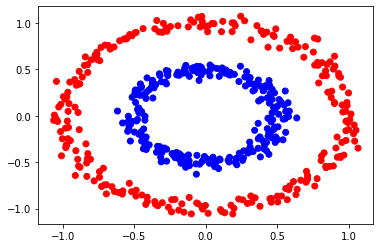

In [4]:
validation_split=0.1
plt.scatter(np.transpose(x)[0],np.transpose(x)[1],color=lc)
plt.show()

در زیر یک شبکه عصبی ایجاد می‌کنیم که دو لایه پنهان با 20 و 50 نورون دارد.
همچنین با خطای binary_crossentropy و معیار صحت مدل را کامپایل می‌کنیم بعد از آن تعدادی متغیر باید تنظیم کنیم.
ای‌پاک و بچ سایز که به ترتیب چندبار کل داده‌ها را آموزش و همچنین بعد از چند داده وزن‌ها را آپدیت کنیم.
همچنین تابع فعالسازی برای این مدل تنظیم نکردیم که تنایج را در ادامه میبینید.
همانطور که مشاهده می‌شود تغییرات خطا بسیار بالاست.

In [5]:
model_without_act = keras.Sequential()
model_without_act.add(keras.layers.Dense(20,input_shape=(2,))) 
model_without_act.add(keras.layers.Dense(50)) 
model_without_act.add(keras.layers.Dense(1))
# model_without_act.summary()

In [6]:
model_without_act.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model_without_act.fit(x,y,epochs=15,batch_size=32,validation_split=0.1,verbose=0)

16/16 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5000


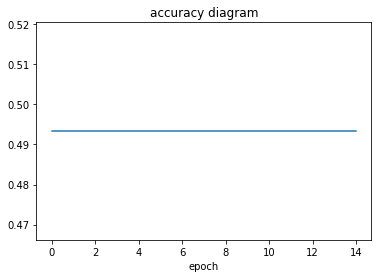

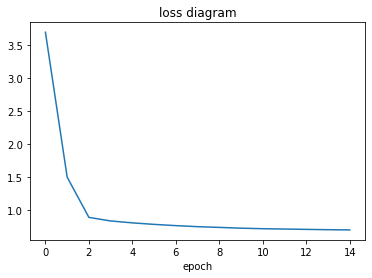

Accuracy: 50.00


In [7]:
_,metric = model_without_act.evaluate(x,y)
plt.plot(history.history['accuracy'])
plt.title('accuracy diagram')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('loss diagram')
plt.xlabel('epoch')
plt.show()

print('Accuracy: %.2f' % (metric*100))

در ادامه تابع فعالساز به مدل اضافه می‌کنیم. تا نتایج بهتری دریافت کنیم.
توابعی که مرسوم هستند بدین صورت است که لایه پنهانی رلو و لایه آخر سیگموید خواهد شد.
همانطور که در ادامه می‌بینیم نتایج بهتری گرفتیم. اما با وجود تغییرات صحت تقریبا روند صعودی دارند. 
همانطور که مشاهده می‌شود مقدار خطا نیز کمتر شد.

In [8]:
model_with_act = keras.Sequential()
model_with_act.add(keras.layers.Dense(8,input_shape=(2,),activation='relu')) 
model_with_act.add(keras.layers.Dense(20,activation='relu')) 
model_with_act.add(keras.layers.Dense(1,activation='sigmoid'))

In [9]:
model_with_act.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history_with_act = model_with_act.fit(x,y,epochs=15,batch_size=32,validation_split=0.1,verbose=0)

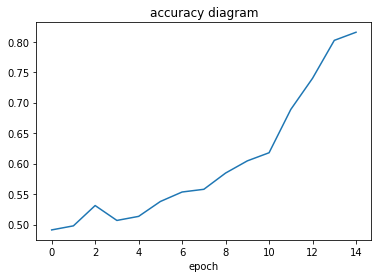

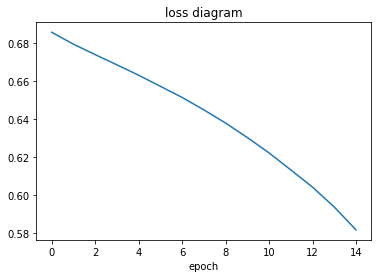

In [10]:
plt.plot(history_with_act.history['accuracy'])
plt.title('accuracy diagram')
plt.xlabel('epoch')
plt.show()

plt.plot(history_with_act.history['loss'])
plt.title('loss diagram')
plt.xlabel('epoch')
plt.show()

در این قسمت با توجه به مراحل کار به جای binary_crossentropy از mean_squared_error استفاده می‌کنیم که به عنوان خطای مسئله رگرسیون شناخته می‌شود.
همانطور که مشاهده میشود خطا بسیار کمتر شده است نسبت به حالت قبل .
حال مرحله بعدی با یک لایه پنهانی مدل را می‌سازیم

In [11]:
model_with_reg_act = keras.Sequential()
model_with_reg_act.add(keras.layers.Dense(8,input_shape=(2,),activation='relu')) 
model_with_reg_act.add(keras.layers.Dense(20,activation='relu')) 
model_with_reg_act.add(keras.layers.Dense(1,activation='sigmoid'))
# model_with_reg_act.summary()

In [12]:
model_with_reg_act.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
history_with_reg_act = model_with_reg_act.fit(x,y,epochs=15,batch_size=32,validation_split=0.1,verbose=0)

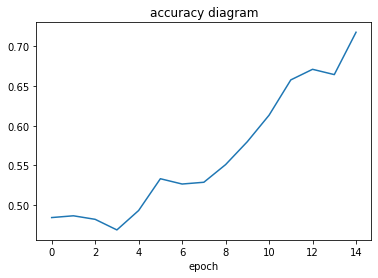

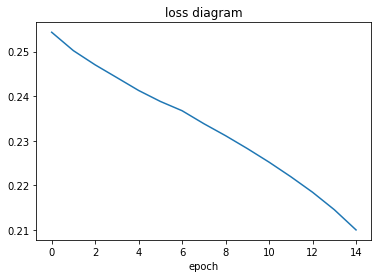

In [13]:
plt.plot(history_with_reg_act.history['accuracy'])
plt.title('accuracy diagram')
plt.xlabel('epoch')
plt.show()

plt.plot(history_with_reg_act.history['loss'])
plt.title('loss diagram')
plt.xlabel('epoch')
plt.show()

در این مرحله یک لایه پنهانی با 75 نورون می‌سازیم که همانطور که مشاهده می‌شود صحت مدل بسیار بالاتر و همچنین خطا کمتر شده است.

In [14]:
model_with_reg_act_one_layer = keras.Sequential()
model_with_reg_act_one_layer.add(keras.layers.Dense(75,input_shape=(2,),activation='relu')) 
model_with_reg_act_one_layer.add(keras.layers.Dense(1,activation='sigmoid'))
# model_with_reg_act_one_layer.summary()

In [15]:
model_with_reg_act_one_layer.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
history_with_reg_act_one_layer = model_with_reg_act_one_layer.fit(x,y,epochs=15,batch_size=32,validation_split=0.1,verbose=0)

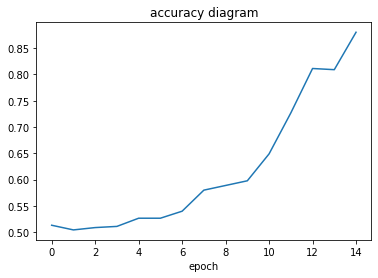

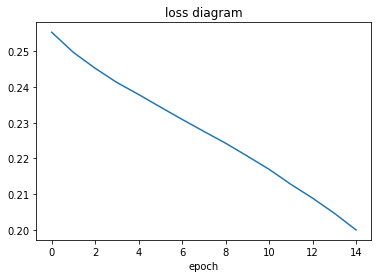

In [16]:
plt.plot(history_with_reg_act_one_layer.history['accuracy'])
plt.title('accuracy diagram')
plt.xlabel('epoch')
plt.show()

plt.plot(history_with_reg_act_one_layer.history['loss'])
plt.title('loss diagram')
plt.xlabel('epoch')
plt.show()

در این مرحله با انتخاب نرخ یادگیری قصد بهتر کردن مدل را داریم از این جهت در ادامه نتیجه را می‌بینیم.
همانطور که مشاهده می‌شود با نرخ یادگیری 0.1 نتیجه خوبی دریافت خواهیم کرد.

In [17]:
learning_rate = keras.optimizers.Adam(learning_rate=0.01)

In [18]:
model_with_reg_act_one_layer_learning = keras.Sequential()
model_with_reg_act_one_layer_learning.add(keras.layers.Dense(75,input_shape=(2,),activation='relu')) 
model_with_reg_act_one_layer_learning.add(keras.layers.Dense(1,activation='sigmoid'))
# model_with_reg_act_one_layer.summary()

In [19]:
model_with_reg_act_one_layer_learning.compile(optimizer=learning_rate,loss='mean_squared_error',metrics=['accuracy'])
history_with_reg_act_one_layer_learning = model_with_reg_act_one_layer_learning.fit(x,y,epochs=15,batch_size=32,validation_split=0.1,verbose=0)

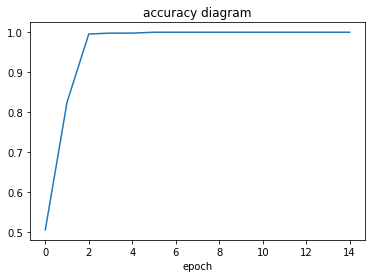

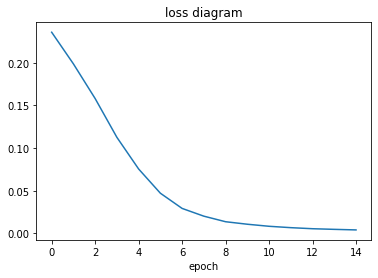

In [20]:
plt.plot(history_with_reg_act_one_layer_learning.history['accuracy'])
plt.title('accuracy diagram')
plt.xlabel('epoch')
plt.show()

plt.plot(history_with_reg_act_one_layer_learning.history['loss'])
plt.title('loss diagram')
plt.xlabel('epoch')
plt.show()

با نرخ یادگیری 0.0001 تست کردیم.
همانطور که مشاهده می‌شود سرعت همگرایی به شدت کاهش می‌یابد. و نتیجه خوبی بدست نمی‌آید.

In [21]:
learning_rate = keras.optimizers.Adam(learning_rate=0.0001)

In [22]:
model_with_reg_act_one_layer_learning0001 = keras.Sequential()
model_with_reg_act_one_layer_learning0001.add(keras.layers.Dense(75,input_shape=(2,),activation='relu')) 
model_with_reg_act_one_layer_learning0001.add(keras.layers.Dense(1,activation='sigmoid'))
# model_with_reg_act_one_layer.summary()

In [23]:
model_with_reg_act_one_layer_learning0001.compile(optimizer=learning_rate,loss='mean_squared_error',metrics=['accuracy'])
history_with_reg_act_one_layer_learning0001 = model_with_reg_act_one_layer_learning0001.fit(x,y,epochs=15,batch_size=32,validation_split=0.1,verbose=0)

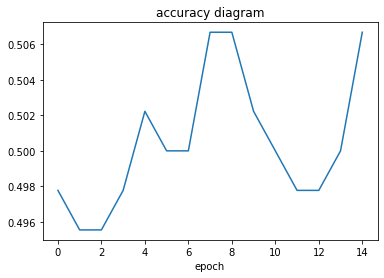

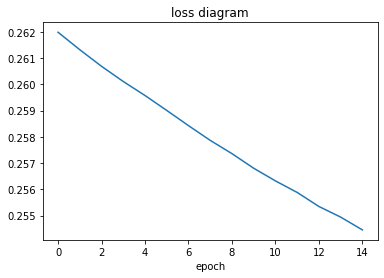

In [24]:
plt.plot(history_with_reg_act_one_layer_learning0001.history['accuracy'])
plt.title('accuracy diagram')
plt.xlabel('epoch')
plt.show()

plt.plot(history_with_reg_act_one_layer_learning0001.history['loss'])
plt.title('loss diagram')
plt.xlabel('epoch')
plt.show()

نرخ یادگیری 0.9 که عدد بزرگی محسوب می‌شود سرعت یادگیری را به شدت زیاد کرده و باعث همگرایی میشود میکند و پیش بینی مدل عدد بدی خواهد بود.

In [25]:
learning_rate = keras.optimizers.Adam(learning_rate=0.9)

In [26]:
model_with_reg_act_one_layer_learning9 = keras.Sequential()
model_with_reg_act_one_layer_learning9.add(keras.layers.Dense(75,input_shape=(2,),activation='relu')) 
model_with_reg_act_one_layer_learning9.add(keras.layers.Dense(1,activation='sigmoid'))
# model_with_reg_act_one_layer.summary()

In [27]:
model_with_reg_act_one_layer_learning9.compile(optimizer=learning_rate,loss='mean_squared_error',metrics=['accuracy'])
history_with_reg_act_one_layer_learning9 = model_with_reg_act_one_layer_learning9.fit(x,y,epochs=15,batch_size=32,validation_split=0.1,verbose=0)

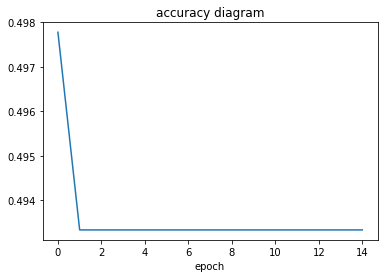

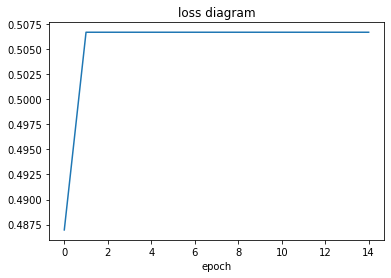

In [28]:
plt.plot(history_with_reg_act_one_layer_learning9.history['accuracy'])
plt.title('accuracy diagram')
plt.xlabel('epoch')
plt.show()

plt.plot(history_with_reg_act_one_layer_learning9.history['loss'])
plt.title('loss diagram')
plt.xlabel('epoch')
plt.show()

مدل نهایی مورد نظر که تمام جزییات آنها در قسمت‌های قبل گفته شده به شرح زیر می‌باشد.

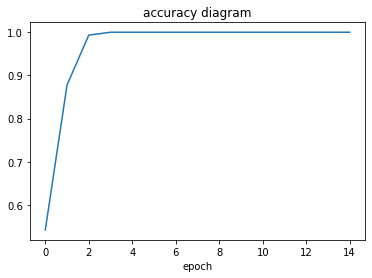

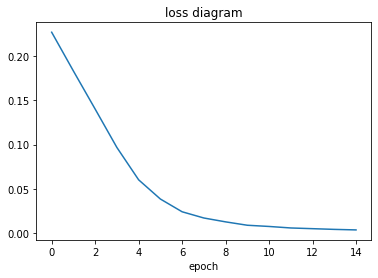

In [29]:
learning_rate = keras.optimizers.Adam(learning_rate=0.01)
final = keras.Sequential()
final.add(keras.layers.Dense(75,input_shape=(2,),activation='relu')) 
final.add(keras.layers.Dense(1,activation='sigmoid'))
# final.summary()
final.compile(optimizer=learning_rate,loss='mean_squared_error',metrics=['accuracy'])
history_final = final.fit(x,y,epochs=15,batch_size=32,validation_split=0.1,verbose=0)
plt.plot(history_final.history['accuracy'])
plt.title('accuracy diagram')
plt.xlabel('epoch')
plt.show()

plt.plot(history_final.history['loss'])
plt.title('loss diagram')
plt.xlabel('epoch')
plt.show()

# **بخش دوم**

این مجموعه داده ای متشکل از 60000 تصویر 28×28 پیکسلی در مقیاس خاکستری است که ابتدا آن‌ها را لود می‌کنیم
این مجموعه 10 کلاس دارد که در زیر مشاهده می‌کنیم.


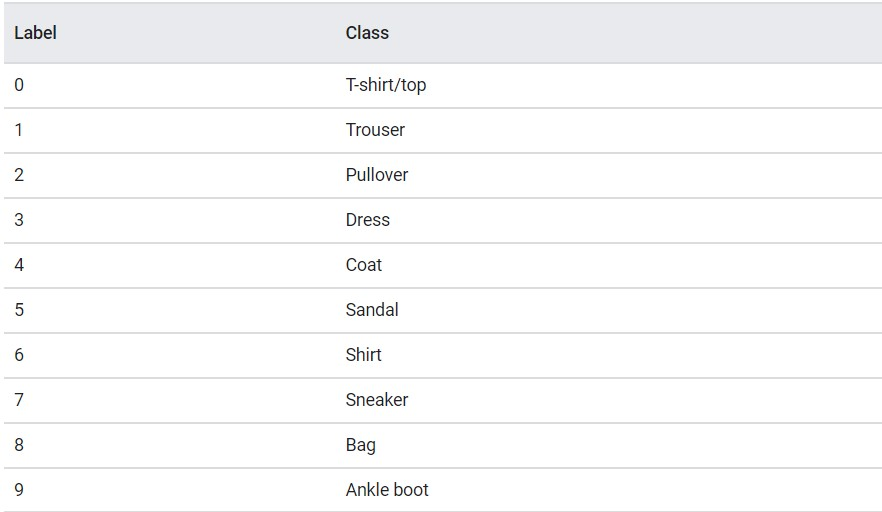

همچنین چند نمونه از این عکس‌ها را در زیر مشاهده می‌کنیم.
جهت راحتی کار داده هارا تغییر شکل می‌دهیم.(یک کانال رنگی)
همچنین هر مقدار عدد تعلق به یک کلاس را به یک بردار دودویی 10تایی تبدیل میکنیم
بعد از آن مرحله نرمال سازی داده‌هاست که مقادیر 0 تا 255 را به فضای 0 تا 1 میبریم.


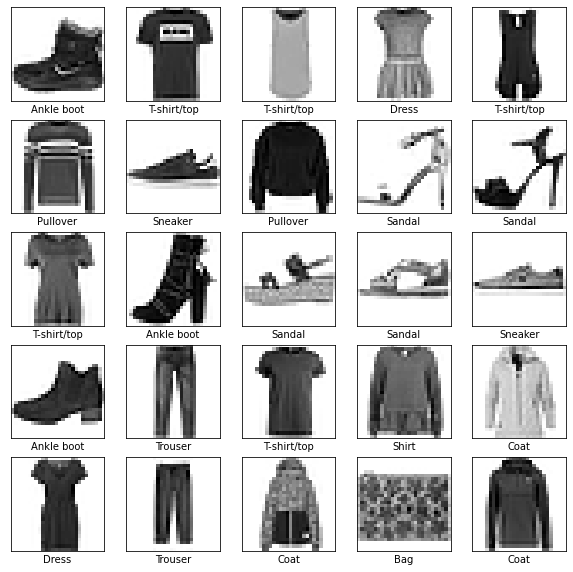

In [43]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
# one hot encode target values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_norm = train_images.astype('float32')
test_norm = test_images.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0




در این قسمت مدل ساخته شد.
ابتدا با یک لایه پنهانی تست شد که نتیجه مطلوبی دریافت نشد.
بعد از آن یک لایه دیگر با 80 نورون اضافه کردیم که منجر به بهبود نتایج شد اما همچنان کافی نبود.
بعد ازآن تابع softmax را به آن اضافه کردیم که به نتیجه زیر منجر شد.


In [54]:
fashion_mnist_model = keras.Sequential()
fashion_mnist_model.add(keras.layers.Dense(128, activation='relu',input_shape=(28, 28, 1)))
fashion_mnist_model.add(keras.layers.Dense(80, activation='relu'))
fashion_mnist_model.add(keras.layers.Flatten())
fashion_mnist_model.add(keras.layers.Dense(10, activation='softmax'))

Epoch 1/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.4772 - accuracy: 0.8319
Epoch 2/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.3939 - accuracy: 0.8607
Epoch 3/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.3764 - accuracy: 0.8664
Epoch 4/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.3693 - accuracy: 0.8696
Epoch 5/10
1875/1875 [==============================] - 130s 70ms/step - loss: 0.3527 - accuracy: 0.8731
Epoch 6/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.3709 - accuracy: 0.8646
Epoch 7/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.3889 - accuracy: 0.8598
Epoch 8/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.3822 - accuracy: 0.8615
Epoch 9/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.3785 - accuracy: 0.8632
Epoch 10/10
1875/1875 [==============================] 

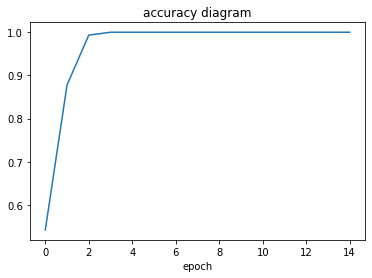

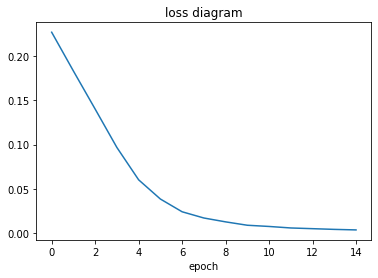

In [55]:
learning_rate = keras.optimizers.Adam(learning_rate=0.01)
fashion_mnist_model.compile(optimizer=learning_rate,loss='categorical_crossentropy',metrics=['accuracy'])
fashion_mnist_model.fit(train_norm, train_labels, epochs=10,batch_size=32)
test_loss, test_acc = fashion_mnist_model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

plt.plot(history_final.history['accuracy'])
plt.title('accuracy diagram')
plt.xlabel('epoch')
plt.show()

plt.plot(history_final.history['loss'])
plt.title('loss diagram')
plt.xlabel('epoch')
plt.show()




در این قسمت ماتریس درهم ریختگی نیز تولید کردیم که با توجه به مدل دقت قابل قبولی دارد.

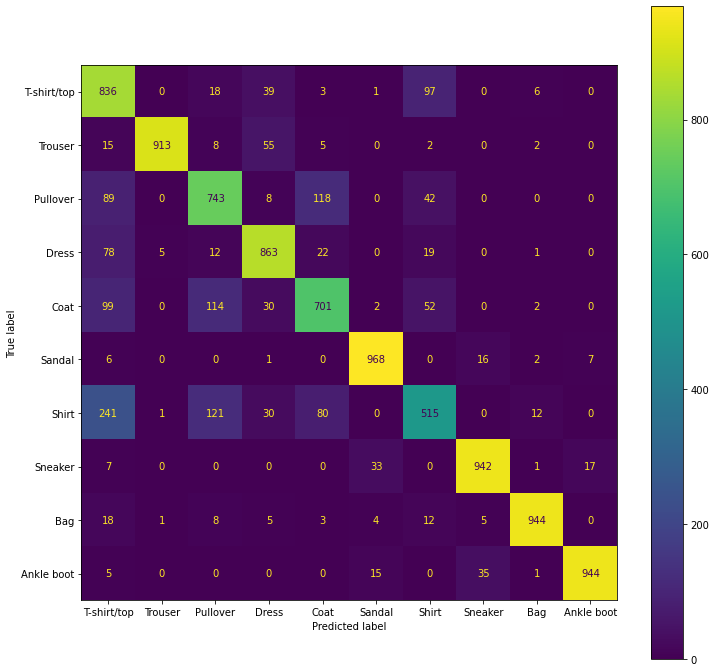

In [58]:
predictions_mnist = (fashion_mnist_model.predict(test_norm) > 0.5).astype(int)
y_pred = predictions_mnist.argmax(axis=1)
y_true = np.argmax(test_labels, axis=1)
cm=confusion_matrix(y_true,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax);